In [2]:
import os
import time
import datetime
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [3]:
DataTrain = pd.read_csv("C:\\Users\\Admin\\Documents\\machine learning\\uncleandata.csv")

In [4]:
Rows, Columns = DataTrain.shape
Columns

11

In [5]:
Rows

15099

In [6]:
DataTrain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15099 entries, 0 to 15098
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15099 non-null  float64
 1   last_evaluation        15099 non-null  float64
 2   number_project         15099 non-null  int64  
 3   average_montly_hours   14728 non-null  float64
 4   time_spend_company     14948 non-null  float64
 5   work_accident          15099 non-null  int64  
 6   left                   15099 non-null  object 
 7   promotion_last_5years  15099 non-null  int64  
 8   is_smoker              239 non-null    object 
 9   department             15099 non-null  object 
 10  salary                 15099 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.3+ MB


In [7]:
#DataTrain.duplicated()
DataTrain.duplicated().sum()

2840

In [8]:
DataTrain.drop_duplicates(inplace=True)
DataTrain.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                 157.0   
1                0.80             0.86               5                 262.0   
2                0.11             0.88               7                 272.0   
3                0.72             0.87               5                 223.0   
4                0.37             0.52               2                   NaN   

   time_spend_company  work_accident left  promotion_last_5years is_smoker  \
0                 3.0              0  yes                      0       NaN   
1                 6.0              0  yes                      0       yes   
2                 4.0              0  yes                      0       NaN   
3                 5.0              0  yes                      0       NaN   
4                 NaN              0  yes                      0        no   

  department  salary  
0      sales     low  
1      sales  medium  
2      sales  medium  
3      sales     low  
4      sales     low

array([[<AxesSubplot:title={'center':'time_spend_company'}>]],
      dtype=object)

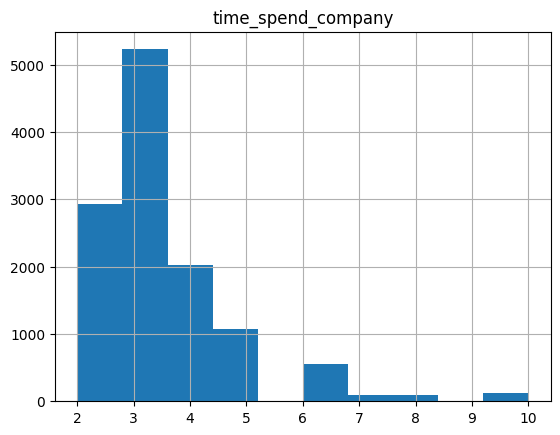

In [9]:
DataTrain.hist(column='time_spend_company')

array([[<AxesSubplot:title={'center':'work_accident'}>]], dtype=object)

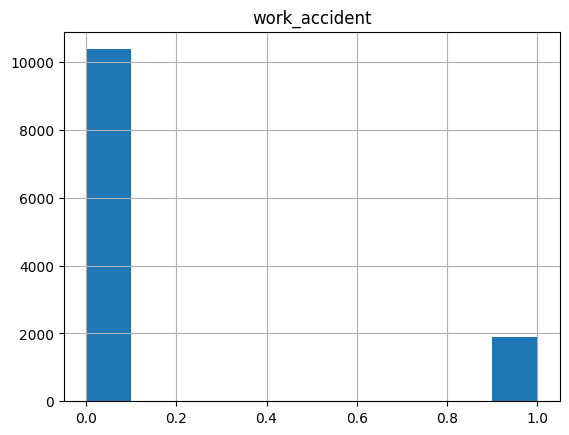

In [10]:
DataTrain.hist(column='work_accident')

In [11]:
DataTrain.hist(column='promotion_last_5years')

array([[<AxesSubplot:title={'center':'promotion_last_5years'}>]],
      dtype=object)

array([[<AxesSubplot:title={'center':'average_montly_hours'}>]],
      dtype=object)

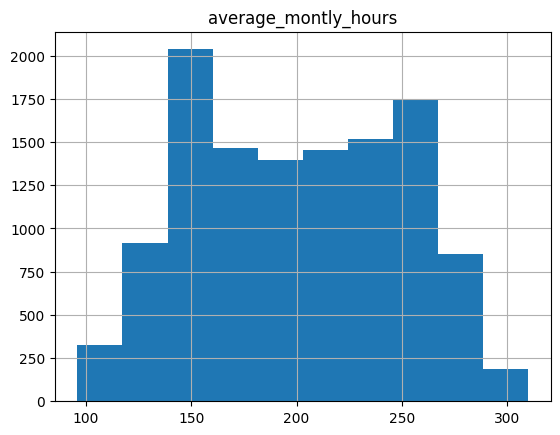

In [12]:
DataTrain.hist(column='average_montly_hours')

In [13]:
DataTrain.hist(column='number_project')

array([[<AxesSubplot:title={'center':'number_project'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'last_evaluation'}>]], dtype=object)

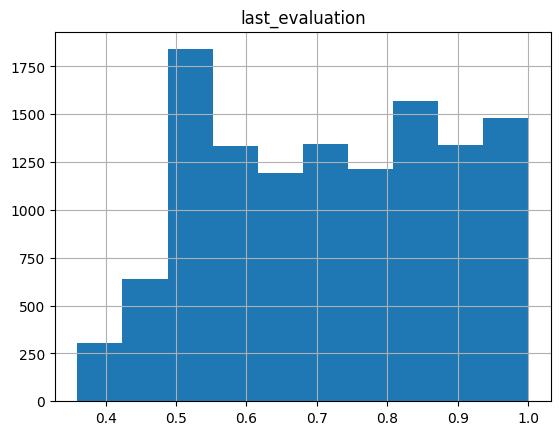

In [14]:
DataTrain.hist(column='last_evaluation')

array([[<AxesSubplot:title={'center':'satisfaction_level'}>]],
      dtype=object)

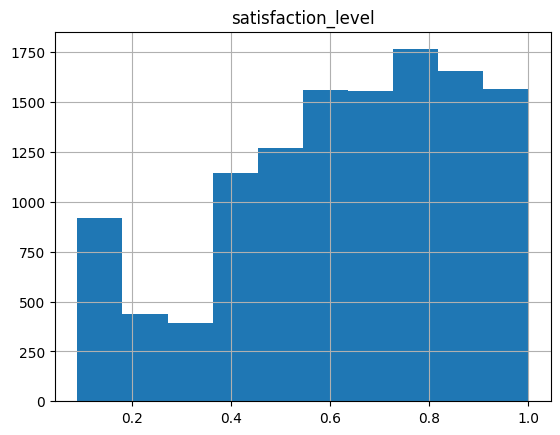

In [15]:
DataTrain.hist(column='satisfaction_level')

<AxesSubplot:xlabel='department', ylabel='Count'>

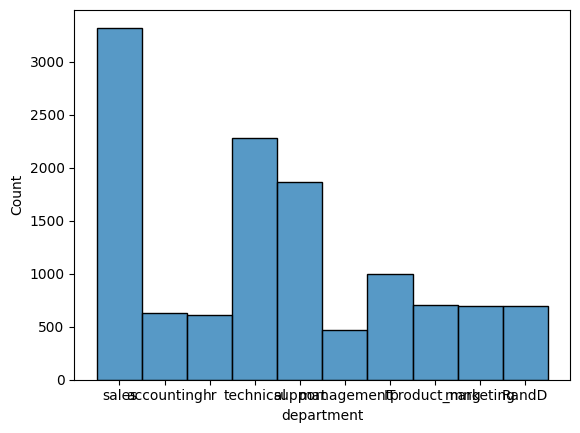

In [16]:
sb.histplot(DataTrain["department"])

<AxesSubplot:xlabel='is_smoker', ylabel='Count'>

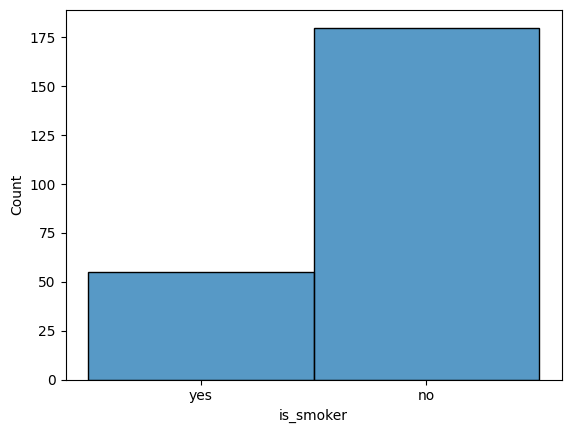

In [17]:
sb.histplot(DataTrain["is_smoker"])

<AxesSubplot:xlabel='salary', ylabel='Count'>

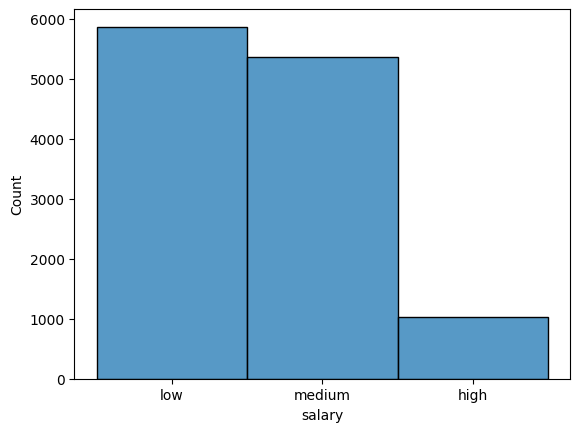

In [18]:
sb.histplot(DataTrain["salary"])

In [19]:
DataTrain.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours       368
time_spend_company         150
work_accident                0
left                         0
promotion_last_5years        0
is_smoker                12024
department                   0
salary                       0
dtype: int64

In [20]:
DataTrain.isnull().sum().sum()

12542

In [21]:
LargestMissingValues = DataTrain.isnull().sum().idxmax()
DataTrain = DataTrain.drop(columns=LargestMissingValues)
DataTrain.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                 157.0   
1                0.80             0.86               5                 262.0   
2                0.11             0.88               7                 272.0   
3                0.72             0.87               5                 223.0   
4                0.37             0.52               2                   NaN   

   time_spend_company  work_accident left  promotion_last_5years department  \
0                 3.0              0  yes                      0      sales   
1                 6.0              0  yes                      0      sales   
2                 4.0              0  yes                      0      sales   
3                 5.0              0  yes                      0      sales   
4                 NaN              0  yes                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [22]:
DataTrain = DataTrain.fillna(DataTrain.mean(numeric_only=True).round(2))
DataTrain.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                157.00   
1                0.80             0.86               5                262.00   
2                0.11             0.88               7                272.00   
3                0.72             0.87               5                223.00   
4                0.37             0.52               2                200.51   

   time_spend_company  work_accident left  promotion_last_5years department  \
0                3.00              0  yes                      0      sales   
1                6.00              0  yes                      0      sales   
2                4.00              0  yes                      0      sales   
3                5.00              0  yes                      0      sales   
4                3.38              0  yes                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [23]:
DataTrain['left'] = DataTrain['left'].map({'no':0,'yes':1})
DataTrain.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                157.00   
1                0.80             0.86               5                262.00   
2                0.11             0.88               7                272.00   
3                0.72             0.87               5                223.00   
4                0.37             0.52               2                200.51   

   time_spend_company  work_accident  left  promotion_last_5years department  \
0                3.00              0     1                      0      sales   
1                6.00              0     1                      0      sales   
2                4.00              0     1                      0      sales   
3                5.00              0     1                      0      sales   
4                3.38              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [24]:
DataTrain.to_csv("CleanData.csv")

In [25]:
datatrain = DataTrain.drop(columns='left')
DataTrainSet,DataTestSet = train_test_split(datatrain,test_size=0.2)
DataTrainSet

satisfaction_level  last_evaluation  number_project  \
1473                 0.09             0.96               6   
7313                 0.31             0.42               2   
6164                 0.72             0.55               4   
8943                 0.36             0.66               4   
9054                 0.64             0.77               3   
...                   ...              ...             ...   
6688                 0.52             0.95               3   
4788                 0.93             0.74               2   
7748                 0.62             0.65               3   
7479                 0.65             0.97               3   
10852                0.84             0.54               3   

       average_montly_hours  time_spend_company  work_accident  \
1473                 245.00                 4.0              0   
7313                 169.00                 5.0              0   
6164                 145.00                 3.0              0   
8943                  97.00                 2.0              0   
9054                 249.00                 2.0              1   
...                     ...                 ...            ...   
6688                 171.00                 3.0              1   
4788                 169.00                 4.0              0   
7748                 249.00                 3.0              0   
7479                 198.00                 3.0              0   
10852                200.51                 3.0              0   

       promotion_last_5years department  salary  
1473                       0      sales  medium  
7313                       0         IT     low  
6164                       0  technical     low  
8943                       0      sales    high  
9054                       0    support     low  
...                      ...        ...     ...  
6688                       0    support     low  
4788                       0    support     low  
7748                       0  technical     low  
7479                       0      RandD     low  
10852                      0      sales     low  

[9807 rows x 9 columns]

In [26]:
DataTestSet

satisfaction_level  last_evaluation  number_project  \
11252                0.76             0.45               4   
9473                 0.75             0.53               3   
5775                 0.86             0.69               5   
729                  0.09             0.83               6   
4357                 0.58             0.93               5   
...                   ...              ...             ...   
8508                 0.75             0.98               3   
4579                 0.67             0.74               3   
228                  0.85             0.95               5   
7872                 0.13             0.52               6   
3573                 0.76             0.72               4   

       average_montly_hours  time_spend_company  work_accident  \
11252                 147.0                 2.0              0   
9473                  154.0                 2.0              0   
5775                  157.0                 4.0              0   
729                   282.0                 4.0              0   
4357                  235.0                 2.0              0   
...                     ...                 ...            ...   
8508                  206.0                 2.0              0   
4579                  204.0                 3.0              0   
228                   236.0                 5.0              0   
7872                  188.0                 3.0              0   
3573                  266.0                 3.0              0   

       promotion_last_5years   department  salary  
11252                      0  product_mng  medium  
9473                       0        sales  medium  
5775                       0      support     low  
729                        0    technical  medium  
4357                       0   management     low  
...                      ...          ...     ...  
8508                       0           hr     low  
4579                       0        RandD  medium  
228                        0           hr     low  
7872                       0        sales  medium  
3573                       0           IT  medium  

[2452 rows x 9 columns]

In [29]:
TrainingSet,TestingSet = train_test_split(datatrain,test_size=0.2,stratify=DataTrain['left'])
TrainingSet

satisfaction_level  last_evaluation  number_project  \
9201                 1.00             0.89               4   
4738                 0.68             0.99               3   
11652                0.74             0.67               5   
4971                 0.63             0.74               4   
2407                 0.69             0.63               4   
...                   ...              ...             ...   
4920                 0.96             0.71               3   
8713                 0.81             0.50               3   
5251                 0.50             0.50               4   
7905                 0.54             0.62               2   
10408                1.00             0.88               4   

       average_montly_hours  time_spend_company  work_accident  \
9201                  152.0                 3.0              0   
4738                  263.0                 3.0              1   
11652                 216.0                 3.0              0   
4971                  155.0                 2.0              0   
2407                  217.0                 3.0              0   
...                     ...                 ...            ...   
4920                  170.0                 3.0              0   
8713                  198.0                 3.0              0   
5251                  267.0                 3.0              0   
7905                  141.0                 2.0              0   
10408                 252.0                 4.0              0   

       promotion_last_5years  department  salary  
9201                       0   technical     low  
4738                       1   marketing  medium  
11652                      0       sales     low  
4971                       0       sales  medium  
2407                       0   technical  medium  
...                      ...         ...     ...  
4920                       0   technical     low  
8713                       0       sales     low  
5251                       0          IT  medium  
7905                       0   technical  medium  
10408                      0  accounting     low  

[9807 rows x 9 columns]

In [30]:
TestingSet

satisfaction_level  last_evaluation  number_project  \
355                  0.41             0.57               2   
7090                 0.49             0.57               2   
10744                0.15             0.81               3   
1912                 0.37             0.57               2   
10010                0.85             0.66               5   
...                   ...              ...             ...   
5267                 0.28             0.79               5   
5000                 0.35             1.00               6   
3896                 0.56             0.68               3   
413                  0.45             0.54               2   
6369                 0.91             0.81               4   

       average_montly_hours  time_spend_company  work_accident  \
355                   136.0                 3.0              0   
7090                  213.0                 3.0              1   
10744                 191.0                 5.0              0   
1912                  158.0                 3.0              0   
10010                 189.0                 3.0              0   
...                     ...                 ...            ...   
5267                  202.0                 5.0              0   
5000                  186.0                 2.0              0   
3896                  149.0                 2.0              0   
413                   142.0                 3.0              0   
6369                  139.0                 2.0              0   

       promotion_last_5years   department  salary  
355                        0      support     low  
7090                       0  product_mng     low  
10744                      0   management  medium  
1912                       0    technical     low  
10010                      0        sales  medium  
...                      ...          ...     ...  
5267                       0   accounting     low  
5000                       0    technical     low  
3896                       0   management  medium  
413                        0           hr  medium  
6369                       0    technical    high  

[2452 rows x 9 columns]